<a href="https://colab.research.google.com/github/thsnyder/portfolio/blob/master/Prioritizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.offsetbox import AnchoredText

In [ ]:
listA = []
listUrg = []
listImp = []
listMea = []
listOrg = []
print("Let's prioritize some things")
# Input number of elemetns
n = int(input("Enter number of items in the list : "))
# iterating till the range
for i in range(0, n):
   print("Enter task No-{} to prioritize: ".format(i+1))
   elm = (input())
   listA.append(elm) # adding the element
   print("Enter task urgency (0-10): ".format(i+1))
   urg = int(input())
   listUrg.append(urg) # adding the element
   print("Enter task importance (0-10): ".format(i+1))
   imp = int(input())
   listImp.append(imp) # adding the element
   print("Enter task meaningfulness (0-10): ".format(i+1))
   mea = int(input())
   listMea.append(mea) # adding the element
   print("Is this task for work or life?: ".format(i+1))
   org = input()
  #  if org == 'work':
  #       org = 14
  #  else:
  #       org = 2
   listOrg.append(org) # adding the element
print("We'll prioritize: \n",listA)
print(listOrg)

Let's prioritize some things
Enter number of items in the list : 3
Enter task No-1 to prioritize: 
Pay taxes
Enter task urgency (0-10): 
7
Enter task importance (0-10): 
8
Enter task meaningfulness (0-10): 
3
Is this task for work or life?: 
life
Enter task No-2 to prioritize: 
Answer emails
Enter task urgency (0-10): 
3
Enter task importance (0-10): 
4
Enter task meaningfulness (0-10): 
2
Is this task for work or life?: 
work
Enter task No-3 to prioritize: 
Walk
Enter task urgency (0-10): 
3
Enter task importance (0-10): 
3
Enter task meaningfulness (0-10): 
4
Is this task for work or life?: 
life
We'll prioritize: 
 ['Pay taxes', 'Answer emails', 'Walk']
['life', 'work', 'life']


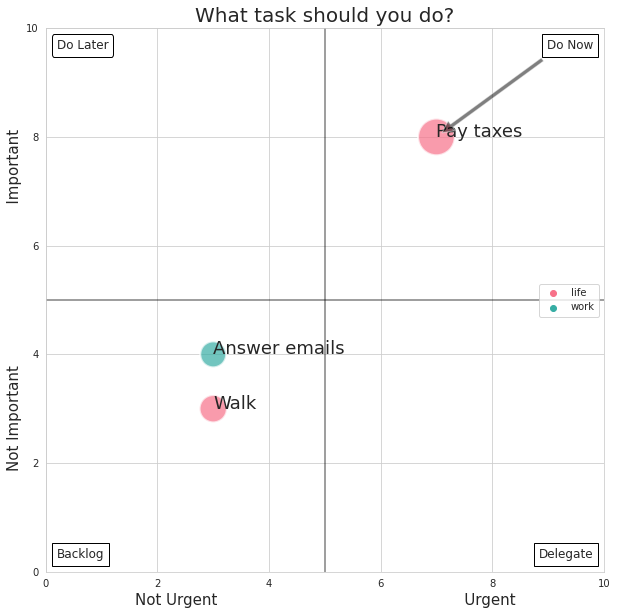

Do this task now:  Pay taxes


In [ ]:
# Fixing random state for reproducibility
np.random.seed(123)
sns.set_style('whitegrid')
sns.color_palette("bright")

N = len(listA)
colors = sns.color_palette("bright", N)
area = []
for i in range(0, len(listA)):
    area.append((listImp[i] + listMea[i] + listUrg[i])*75)

doNow = np.max(area)
doNow = area.index(np.max(area))
x = listUrg[doNow]
y = listImp[doNow]

# plot
fig, ax = plt.subplots(figsize=(10,10))
red = "\033[0;31m"

sns.scatterplot(x=listUrg, y=listImp, hue=listOrg, s=area, alpha=.7, palette="husl")

ax.set(xlim=(0, 10), xticks=np.arange(0, 11, 2),
       ylim=(0, 10), yticks=np.arange(0, 11, 2))
ax.set_xlabel('Not Urgent                                                    Urgent', fontsize=15)
ax.set_ylabel('Not Important                                  Important', fontsize=15)
plt.title('What task should you do?', fontsize=20)
plt.axhline(5, color='black', alpha=.5)
plt.axvline(5, color='black', alpha=.5)

for i, txt in enumerate(listA):
    ax.annotate(txt, (listUrg[i], listImp[i]), size=18)
ax.annotate('', xy=(x, y),  xycoords='data',
            xytext=(0.9, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, alpha=.5),
            horizontalalignment='right', verticalalignment='top',
            )
at = AnchoredText(
    "Do Later", prop=dict(size=12), frameon=True, loc='upper left')
at2 = AnchoredText(
    "Do Now", prop=dict(size=12), frameon=True, loc='upper right')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
at3 = AnchoredText(
    "Delegate", prop=dict(size=12), frameon=True, loc='lower right')
at4 = AnchoredText(
    "Backlog", prop=dict(size=12), frameon=True, loc='lower left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

ax.add_artist(at)
ax.add_artist(at2)
ax.add_artist(at3)
ax.add_artist(at4)
sns.move_legend(ax, "center right")


plt.show()
print("Do this task now: ", red + listA[doNow])